In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!file movies.csv

movies.csv: CSV text


In [17]:
File=pd.read_csv("movies.csv", encoding="latin-1")

In [4]:
File

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
File.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [18]:
year_strings = File['Year'].str.extract('(\d+)')

In [19]:
year_strings.dtypes

0    object
dtype: object

In [20]:
File['Year'] = pd.to_numeric(File['Year'].str.extract('(\d+)', expand=False), errors='coerce')
File['Duration'] = File['Duration'].str.replace('min', '').astype(float)
File['Votes'] = pd.to_numeric(File['Votes'], errors='coerce')


In [21]:
File.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   float64
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     6548 non-null   float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [22]:
File['Year'].fillna(File['Year'].median(),inplace=True)
File['Duration'].fillna(File['Duration'].median(),inplace=True)
File['Rating'].fillna(File['Rating'].mean(),inplace=True)
File['Votes'].fillna(File['Votes'].median(),inplace=True)
File['Genre'].fillna(File['Genre'].mode()[0],inplace=True)
File['Director'].fillna(File['Director'].mode()[0],inplace=True)
File['Actor 1'].fillna(File['Actor 1'].mode()[0],inplace=True)
File['Actor 2'].fillna(File['Actor 2'].mode()[0],inplace=True)
File['Actor 3'].fillna(File['Actor 3'].mode()[0],inplace=True)

In [12]:
File.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
File.duplicated().sum()

6

In [13]:
File.drop_duplicates()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,5.841621,35.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.000000,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",5.841621,35.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.400000,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,5.841621,35.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988.0,131.0,Action,4.600000,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129.0,"Action, Drama",4.500000,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.0,131.0,Action,5.841621,35.0,Kiran Thej,Sangeeta Tiwari,Rekha,Pran
15507,Zulmi Shikari,1988.0,131.0,Action,5.841621,35.0,Jayant Desai,Ashok Kumar,Rekha,Pran


In [28]:
categorical_col=File.select_dtypes(include=['object']).columns
File=pd.get_dummies(File, columns=categorical_col, drop_first=True)
print(File)

         Year  Duration    Rating  Votes  \
0      1991.0     131.0  5.841621   35.0   
1      2019.0     109.0  7.000000    8.0   
2      2021.0      90.0  5.841621   35.0   
3      2019.0     110.0  4.400000   35.0   
4      2010.0     105.0  5.841621   35.0   
...       ...       ...       ...    ...   
15504  1988.0     131.0  4.600000   11.0   
15505  1999.0     129.0  4.500000  655.0   
15506  2005.0     131.0  5.841621   35.0   
15507  1988.0     131.0  5.841621   35.0   
15508  1998.0     130.0  6.200000   20.0   

       Name_#Gadhvi (He thought he was Gandhi)  Name_#Homecoming  \
0                                            0                 0   
1                                            1                 0   
2                                            0                 1   
3                                            0                 0   
4                                            0                 0   
...                                        ...               ..

In [30]:
X = File.drop(['Rating'] + [col for col in File.columns if 'Name_' in col], axis=1)
Y = File['Rating']
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=.20)
model=RandomForestRegressor(n_estimators=80, random_state=40)
model.fit(X_train, Y_train)
prediction=model.predict(X_test)

In [ ]:
mse=mean_squared_error(Y_test,prediction)
print('Mean Squared Error on Test Set:',mse)

In [ ]:
results= pd.DataFrame({'Actual':Y_test,'Predicted':prediction})
print(results)

         Actual  Predicted
11621  3.100000   5.192500
13022  5.841621   5.841621
6677   5.841621   5.841621
1688   5.841621   5.841621
3770   5.400000   5.302392
...         ...        ...
243    3.400000   4.475000
12902  5.841621   5.841621
4773   5.000000   5.470000
7161   3.300000   3.953750
12274  5.841621   5.841621

[3102 rows x 2 columns]


In [ ]:
c_matrix=metrics.confusion_matrix(Y_test,prediction)
print("Classification report",classification_report(Y_test,prediction))
accuracy=accuracy_score(Y_test,prediction)
recall= recall_score(Y_test,prediction,average='macro')
precision=precision_score(Y_test,prediction, average='macro')
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)

<ipython-input-14-96302e2c4417>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year_Bin', data=File,saturation = 1,edgecolor = "black", palette = "Set1")


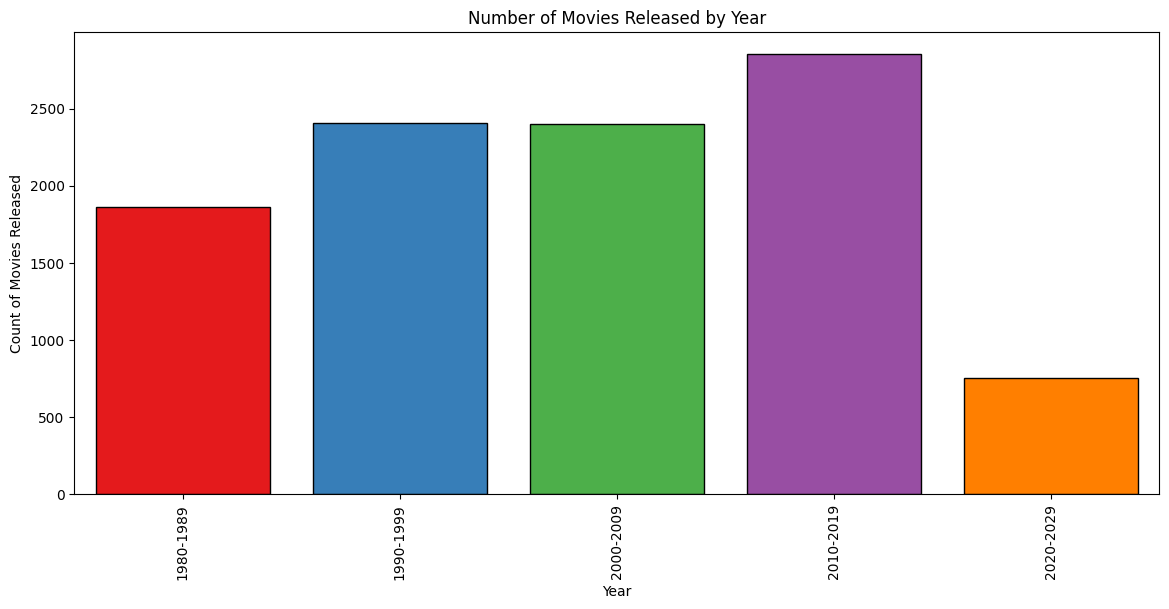

In [14]:
bins = [1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1980-1989', '1990-1999', '2000-2009', '2010-2019', '2020-2029']
File['Year_Bin'] = pd.cut(File['Year'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(14, 6))
sns.countplot(x='Year_Bin', data=File,saturation = 1,edgecolor = "black", palette = "Set1")
plt.xticks(rotation=90)
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Count of Movies Released')
plt.show()

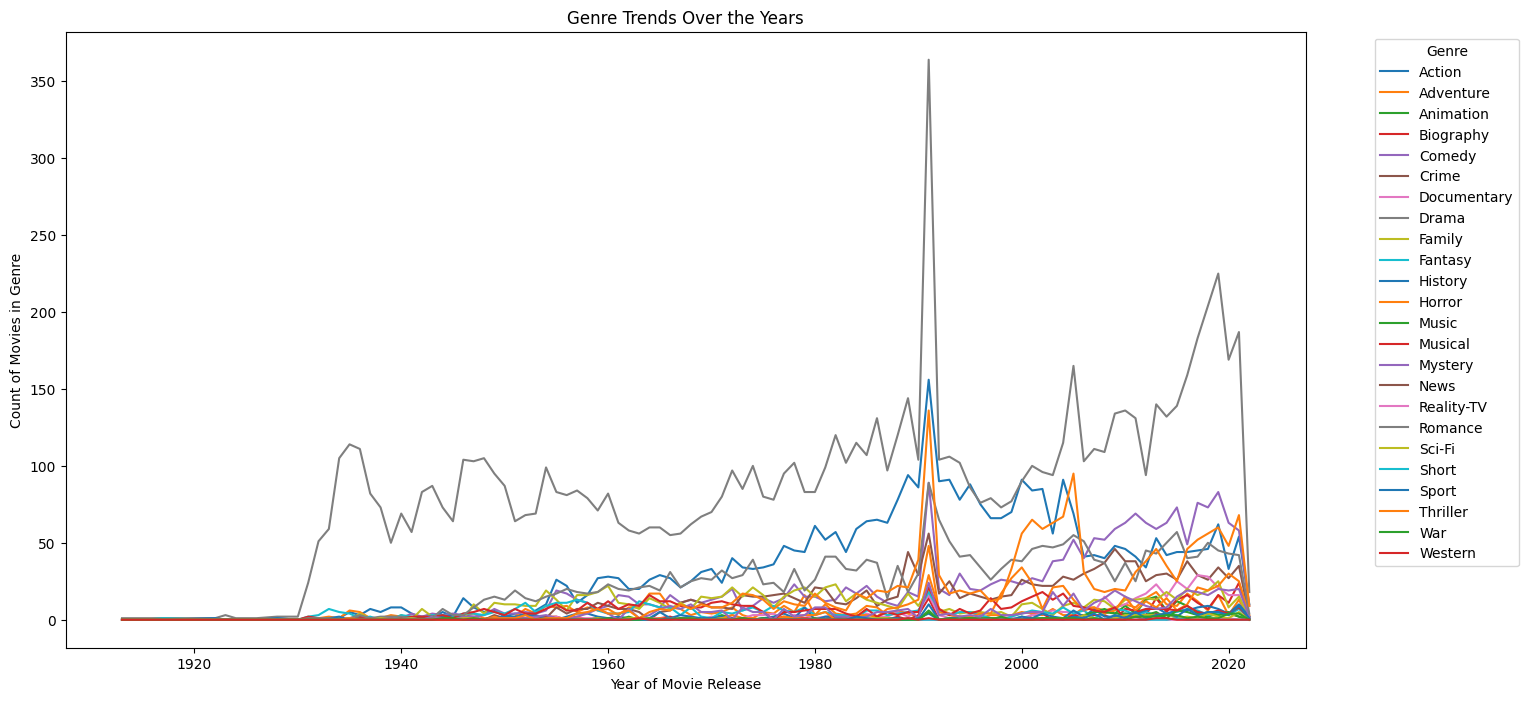

In [23]:
dummies = File['Genre'].str.get_dummies(', ')
df_genre = pd.concat([File, dummies], axis=1)
genre_columns = df_genre.columns[10:]
genre_count_by_year = df_genre.groupby('Year')[genre_columns].sum().reset_index()
plt.figure(figsize=(16, 8))
for genre in genre_columns:
    sns.lineplot(x='Year', y=genre, data=genre_count_by_year, label=genre)

plt.title('Genre Trends Over the Years')
plt.xlabel('Year of Movie Release')
plt.ylabel('Count of Movies in Genre')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

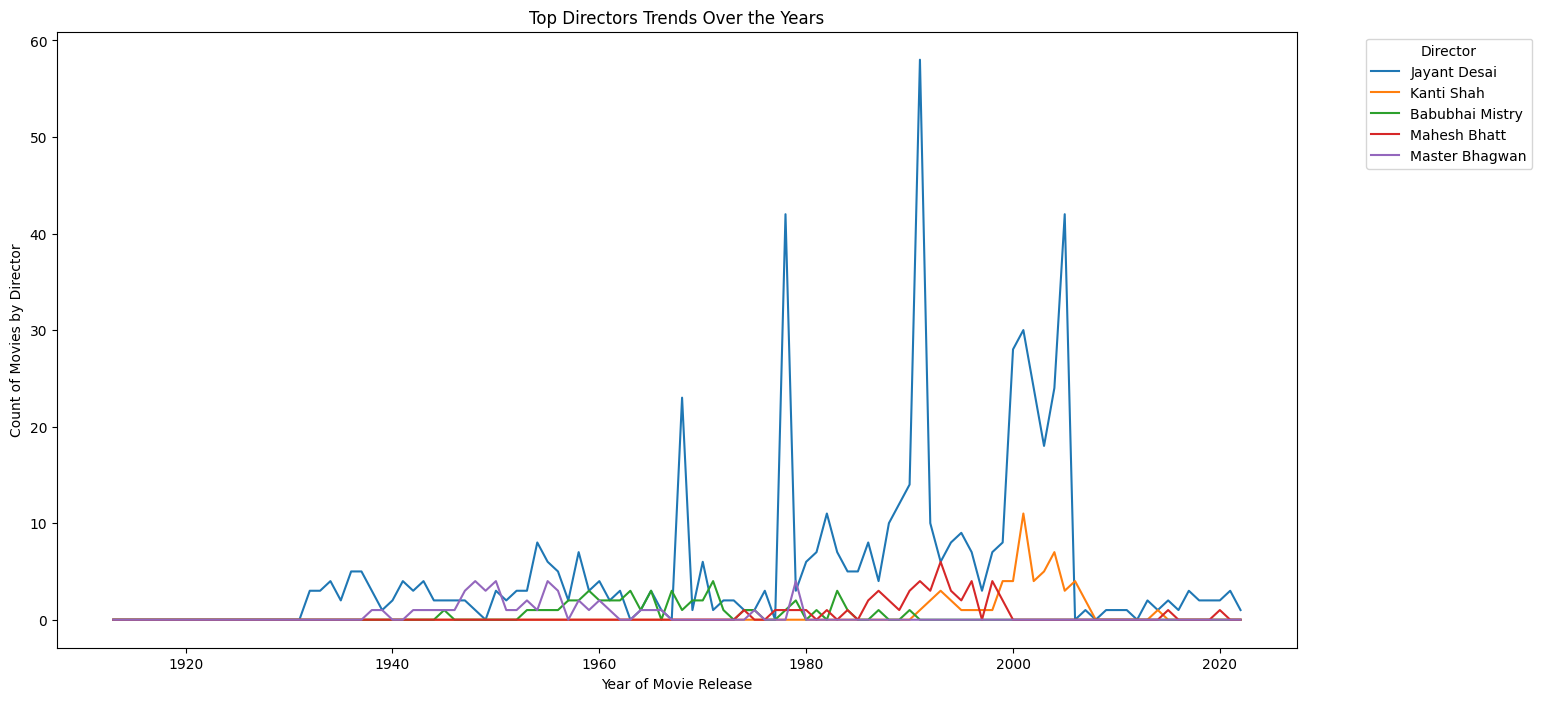

In [24]:
top_directors = File['Director'].value_counts().head(5).index
director_count_by_year = File.groupby(['Year', 'Director']).size().unstack(fill_value=0).reset_index()
plt.figure(figsize=(16, 8))
for director in top_directors:
    sns.lineplot(x='Year', y=director, data=director_count_by_year, label=director)
plt.title('Top Directors Trends Over the Years')
plt.xlabel('Year of Movie Release')
plt.ylabel('Count of Movies by Director')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

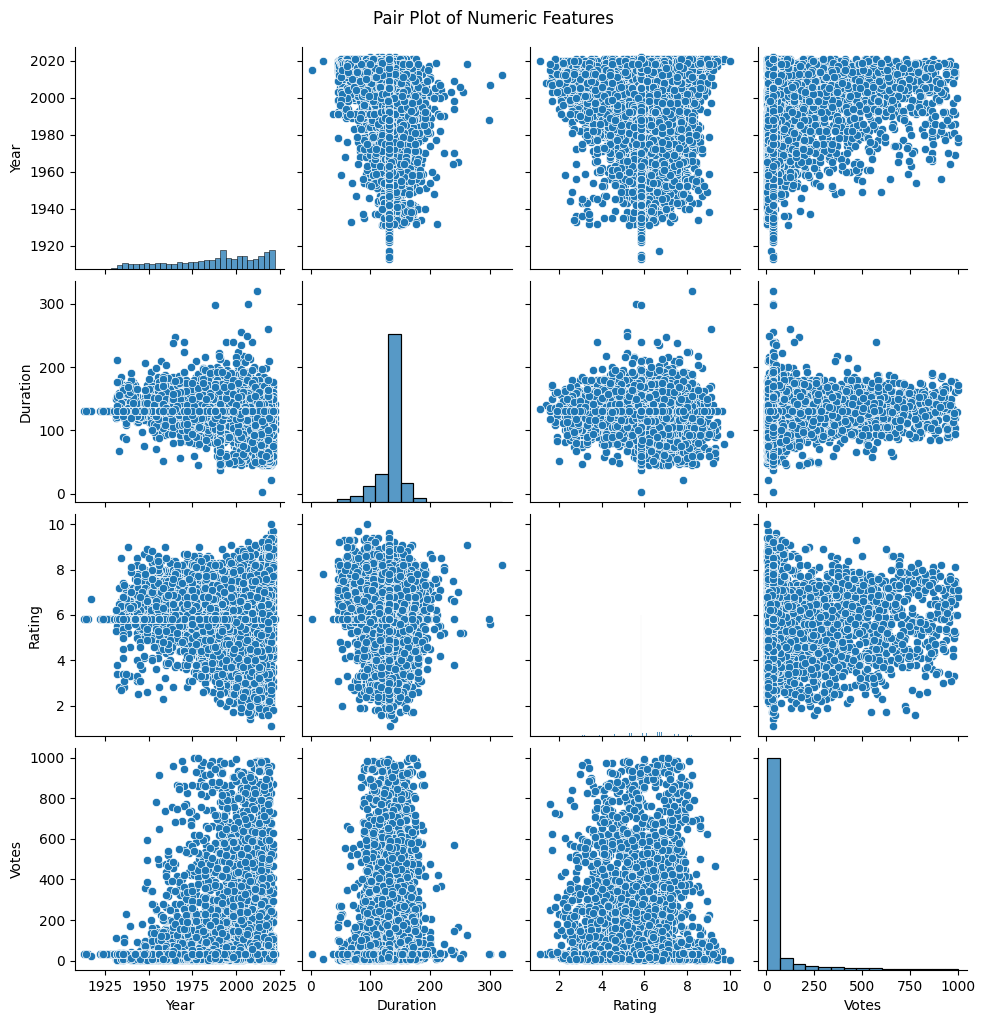

In [25]:
sns.pairplot(File[['Year', 'Duration', 'Rating', 'Votes']])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

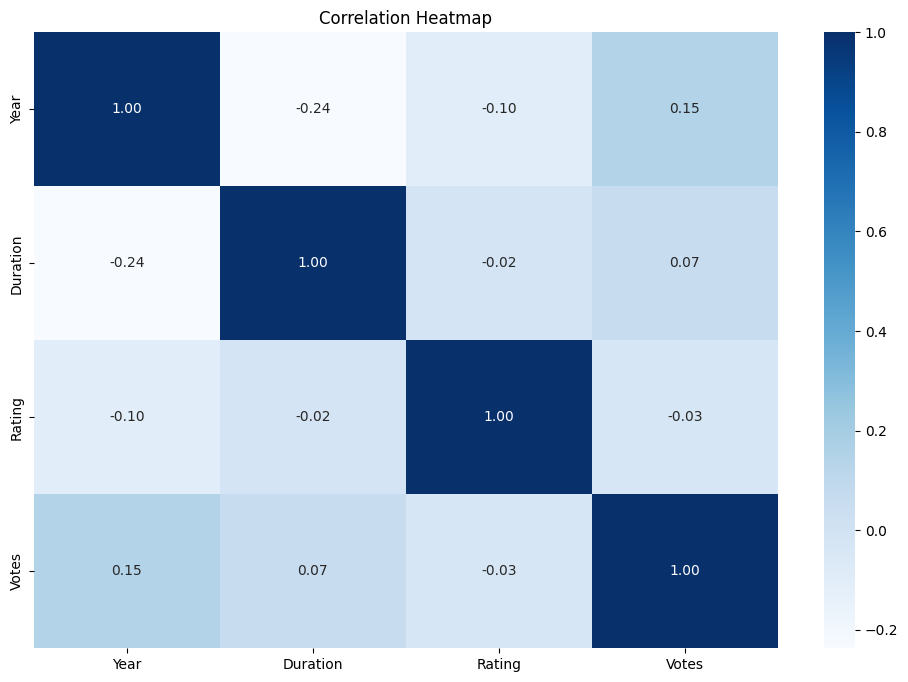

In [27]:
plt.figure(figsize=(12, 8))
correlation_matrix = File[['Year', 'Duration', 'Rating', 'Votes']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()